In [3]:
#Idea: We have bunch of points in space and we need to fit a straight line(2-D) through it
#Regression: there are multiple points(pair of these points, there can be multiple lines)
#Find the Best Line
#Best: ?   ||   least squares
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Linear Regression with NumPy

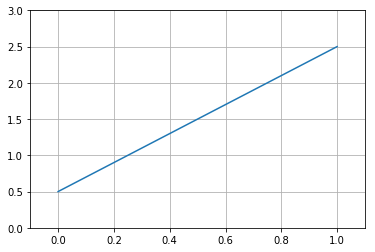

In [9]:
#slope and intercept minmizes the error
x=np.linspace(0,1,20) #list of 20 equally spaced numbers
m=2
c=0.5
y=m*x+c #slope-intercept form
plt.plot(x,y)
plt.axis([-0.1, 1.1, 0, 3])
plt.grid()

In [10]:
x

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [11]:
y

array([0.5       , 0.60526316, 0.71052632, 0.81578947, 0.92105263,
       1.02631579, 1.13157895, 1.23684211, 1.34210526, 1.44736842,
       1.55263158, 1.65789474, 1.76315789, 1.86842105, 1.97368421,
       2.07894737, 2.18421053, 2.28947368, 2.39473684, 2.5       ])

# Imagine there's no line!

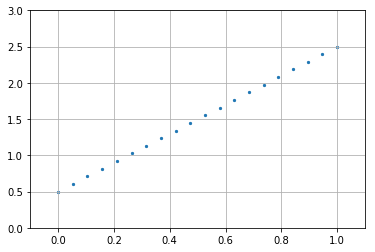

In [13]:
plt.scatter(x, y, s=5)
plt.axis([-0.1, 1.1, 0 ,3]) #discrete points in space
plt.grid()

In [14]:
print(x)

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


In [15]:
print(y)

[0.5        0.60526316 0.71052632 0.81578947 0.92105263 1.02631579
 1.13157895 1.23684211 1.34210526 1.44736842 1.55263158 1.65789474
 1.76315789 1.86842105 1.97368421 2.07894737 2.18421053 2.28947368
 2.39473684 2.5       ]


# Ordinary Least Squares

In [16]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [17]:
print(x)

[[0.        ]
 [0.05263158]
 [0.10526316]
 [0.15789474]
 [0.21052632]
 [0.26315789]
 [0.31578947]
 [0.36842105]
 [0.42105263]
 [0.47368421]
 [0.52631579]
 [0.57894737]
 [0.63157895]
 [0.68421053]
 [0.73684211]
 [0.78947368]
 [0.84210526]
 [0.89473684]
 [0.94736842]
 [1.        ]]


In [18]:
print(y)

[[0.5       ]
 [0.60526316]
 [0.71052632]
 [0.81578947]
 [0.92105263]
 [1.02631579]
 [1.13157895]
 [1.23684211]
 [1.34210526]
 [1.44736842]
 [1.55263158]
 [1.65789474]
 [1.76315789]
 [1.86842105]
 [1.97368421]
 [2.07894737]
 [2.18421053]
 [2.28947368]
 [2.39473684]
 [2.5       ]]


In [20]:
a = np.linalg.inv(np.dot(x.T, x))
b = np.dot(x.T, y)
beta_hat = np.dot(a, b)

In [21]:
beta_hat

array([[2.73076923]])

In [26]:
a = np.linalg.inv(x.T @ x)
b = x.T @ y
beta_hat = a @ b

In [27]:
beta_hat

array([[2.73076923]])

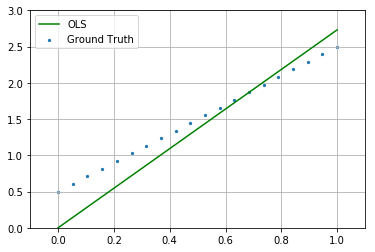

In [30]:
y_hat = np.dot(x, beta_hat)
plt.scatter(x, y, s=5, label='Ground Truth')
plt.plot(x, y_hat, 'g', label='OLS')
plt.legend()
plt.axis([-0.1, 1.1, 0, 3])
plt.grid()

# What went wrong?

# Estimating the error/intercept

In [31]:
x

array([[0.        ],
       [0.05263158],
       [0.10526316],
       [0.15789474],
       [0.21052632],
       [0.26315789],
       [0.31578947],
       [0.36842105],
       [0.42105263],
       [0.47368421],
       [0.52631579],
       [0.57894737],
       [0.63157895],
       [0.68421053],
       [0.73684211],
       [0.78947368],
       [0.84210526],
       [0.89473684],
       [0.94736842],
       [1.        ]])

In [32]:
x = np.c_[x, np.ones(x.shape)] # adding other column

In [33]:
x

array([[0.        , 1.        ],
       [0.05263158, 1.        ],
       [0.10526316, 1.        ],
       [0.15789474, 1.        ],
       [0.21052632, 1.        ],
       [0.26315789, 1.        ],
       [0.31578947, 1.        ],
       [0.36842105, 1.        ],
       [0.42105263, 1.        ],
       [0.47368421, 1.        ],
       [0.52631579, 1.        ],
       [0.57894737, 1.        ],
       [0.63157895, 1.        ],
       [0.68421053, 1.        ],
       [0.73684211, 1.        ],
       [0.78947368, 1.        ],
       [0.84210526, 1.        ],
       [0.89473684, 1.        ],
       [0.94736842, 1.        ],
       [1.        , 1.        ]])

In [34]:
a = np.linalg.inv(np.dot(x.T, x))
b = np.dot(x.T, y)
beta_hat = np.dot(a, b)

In [36]:
beta_hat   #along each dimension there is different slope 

array([[2. ],
       [0.5]])

In [37]:
# ravel() - flattens all the vector
m_hat, c_hat = beta_hat.ravel()
y_hat = x[:, 0] * m_hat + c_hat

In [38]:
y_hat

array([0.5       , 0.60526316, 0.71052632, 0.81578947, 0.92105263,
       1.02631579, 1.13157895, 1.23684211, 1.34210526, 1.44736842,
       1.55263158, 1.65789474, 1.76315789, 1.86842105, 1.97368421,
       2.07894737, 2.18421053, 2.28947368, 2.39473684, 2.5       ])

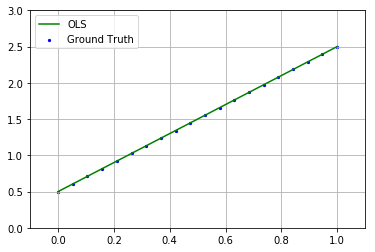

In [39]:
plt.scatter(x[:, 0], y, c='b', s=5, label='Ground Truth')
plt.plot(x[:, 0], y_hat, 'g', label='OLS')
plt.legend()
plt.axis([-0.1, 1.1, 0, 3])
plt.grid()

# Exercise

In [40]:
#step 1: Pick a random slope (m) in the interval [0.5,2]
#step 2: Pick a random intercept (c) in the interval [0,1]
#step 3: Create y = mx+c and add some noise to it, with np.rnadom.rand
#step 4: Find m and c and verify your solution

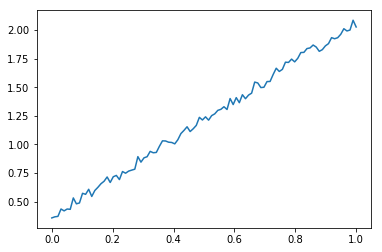

In [58]:
m = 1.7      #slope (m) in the interval [0.5,2]
c = 0.314    #intercept (c) in the interval [0,1]
end = 1
n_points = 100
x = np.linspace(0, end, n_points)
y = m * x + c + np.random.rand(100) * 0.1

plt.plot(x,y)

#Apply OLS Algorithm
#m_hat, c_hat

In [59]:
x = np.c_[x.reshape(-1,1), np.ones((100,1))]
y = y.reshape(-1,1)

In [60]:
a = np.linalg.inv(x.T @ x)
b = x.T @ y
beta_hat = a @ b

In [61]:
m_hat, c_hat = beta_hat.ravel()

In [62]:
m_hat, c_hat

(1.7013788740275375, 0.3628402562246622)